<a href="https://colab.research.google.com/github/rocodoco20/AI1week/blob/main/cuda_psy_1week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [31]:
trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

60000
torch.Size([1, 28, 28]) 5


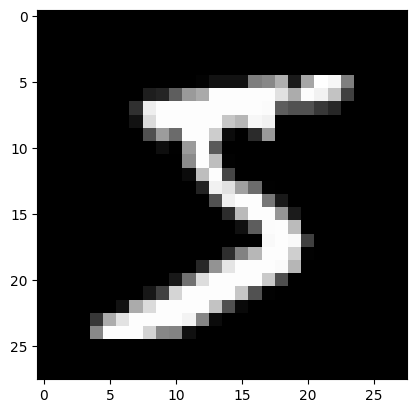

In [42]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

## [MYCODE]train=False 로 설정
## Test 데이터

In [44]:
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [45]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

## [MYCODE]shuffle=False 로 설정

In [47]:
batch_size = 256

testDataLoader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [48]:
from torch import nn
class Model(nn.Module):
    def __init__(self, input_dim, n_dim, num_classes):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, num_classes)

        self.act = nn.ReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)
        return x

## nn.CrossEntropyLoss 적용하기

In [49]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=lr)

In [50]:
def accuracy(model, dataloader):
    cnt = 0
    acc = 0

    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        preds = model(inputs)
        preds = torch.argmax(preds, dim=-1)

        cnt += labels.shape[0]
        acc += (labels == preds).sum().item()

    return acc / cnt

## [LOG] 로그확인

In [51]:
train_accs, test_accs = [], []
n_epochs = 100
for epoch in range(n_epochs):
    total_loss = 0.0

    model.train()
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()
        preds = model(inputs)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Epoch 끝난 후 Train/Test 정확도 측정
    model.eval()
    train_acc = accuracy(model, trainloader)
    test_acc = accuracy(model, testDataLoader)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"[LOG] Epoch {epoch} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

[LOG] Epoch 0 | Loss: 539.8370 | Train Acc: 0.1742 | Test Acc: 0.1722
[LOG] Epoch 1 | Loss: 535.8885 | Train Acc: 0.2686 | Test Acc: 0.2662
[LOG] Epoch 2 | Loss: 531.8305 | Train Acc: 0.3750 | Test Acc: 0.3813
[LOG] Epoch 3 | Loss: 527.5375 | Train Acc: 0.4560 | Test Acc: 0.4670
[LOG] Epoch 4 | Loss: 522.8873 | Train Acc: 0.5110 | Test Acc: 0.5194
[LOG] Epoch 5 | Loss: 517.7544 | Train Acc: 0.5473 | Test Acc: 0.5544
[LOG] Epoch 6 | Loss: 512.0059 | Train Acc: 0.5750 | Test Acc: 0.5799
[LOG] Epoch 7 | Loss: 505.5003 | Train Acc: 0.5986 | Test Acc: 0.6030
[LOG] Epoch 8 | Loss: 498.0902 | Train Acc: 0.6182 | Test Acc: 0.6262
[LOG] Epoch 9 | Loss: 489.6201 | Train Acc: 0.6362 | Test Acc: 0.6444
[LOG] Epoch 10 | Loss: 479.9344 | Train Acc: 0.6526 | Test Acc: 0.6625
[LOG] Epoch 11 | Loss: 468.8916 | Train Acc: 0.6676 | Test Acc: 0.6788
[LOG] Epoch 12 | Loss: 456.3751 | Train Acc: 0.6823 | Test Acc: 0.6913
[LOG] Epoch 13 | Loss: 442.3115 | Train Acc: 0.6928 | Test Acc: 0.7054
[LOG] Epoch 14 |

## plot

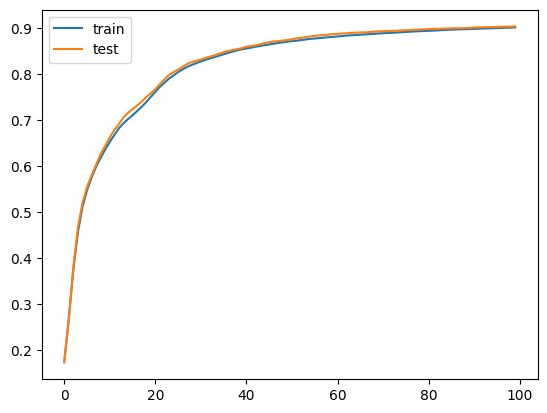

In [52]:
import numpy as np

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

plot_acc(train_accs, test_accs)